In [1]:
import numpy as np 
import pandas as pd
import visualkeras
import numpy as np
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from PIL import ImageFont
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.utils import normalize
from keras.optimizers import SGD
from keras.optimizers import Adam

%matplotlib inline


In [2]:
plt.rcParams['figure.figsize'] = 10, 10

In [3]:
#Load the data.
train = pd.read_json("./data/processed/train.json")

In [4]:
print("training data shape -", train.shape)

training data shape - (1604, 5)


In [5]:
train.head()

id                                             band_1   
0  dfd5f913  [-27.878360999999998, -27.15416, -28.668615, -...  \
1  e25388fd  [-12.242375, -14.920304999999999, -14.920363, ...   
2  58b2aaa0  [-24.603676, -24.603714, -24.871029, -23.15277...   
3  4cfc3a18  [-22.454607, -23.082819, -23.998013, -23.99805...   
4  271f93f4  [-26.006956, -23.164886, -23.164886, -26.89116...   

                                              band_2 inc_angle  is_iceberg  
0  [-27.154118, -29.537888, -31.0306, -32.190483,...   43.9239           0  
1  [-31.506321, -27.984554, -26.645678, -23.76760...   38.1562           0  
2  [-24.870956, -24.092632, -20.653963, -19.41104...   45.2859           1  
3  [-27.889421, -27.519794, -27.165262, -29.10350...   43.8306           0  
4  [-27.206915, -30.259186, -30.259186, -23.16495...   35.6256           0

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1604 non-null   object
 1   band_1      1604 non-null   object
 2   band_2      1604 non-null   object
 3   inc_angle   1604 non-null   object
 4   is_iceberg  1604 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 62.8+ KB


In [7]:
counts = train["inc_angle"].value_counts()
print(counts['na'])

133


In [8]:
train['inc_angle'] = train['inc_angle'].replace('na', 0)
# train = train.loc[train['inc_angle'] != 'na']


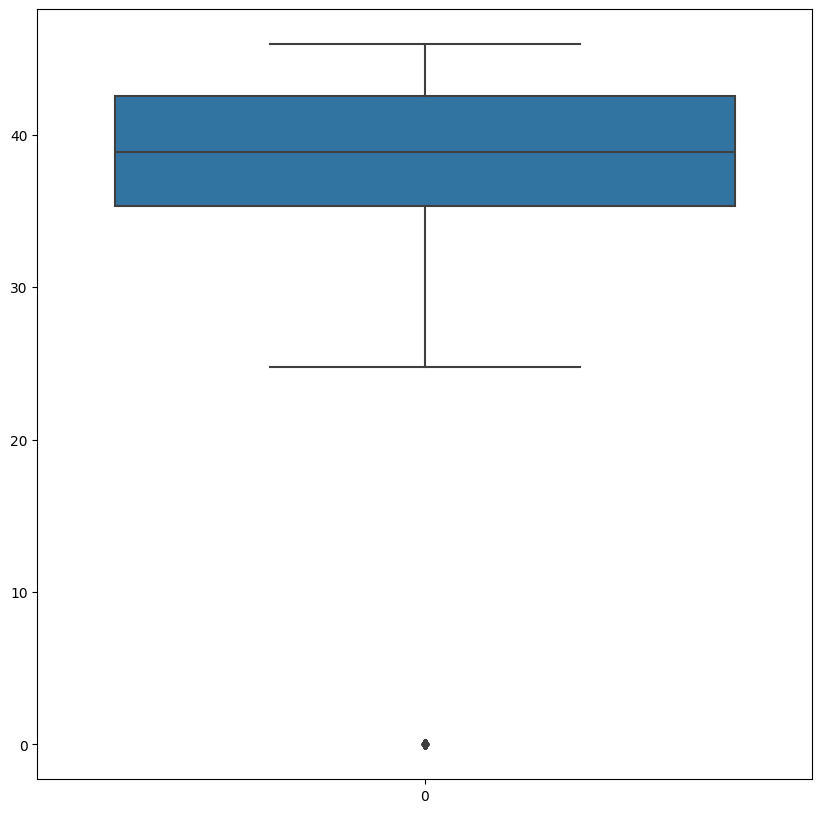

In [9]:
import seaborn as sns
sns.boxplot(train['inc_angle'])
plt.show()


In [10]:
train_v2 = train.loc[train['inc_angle'] != 0]

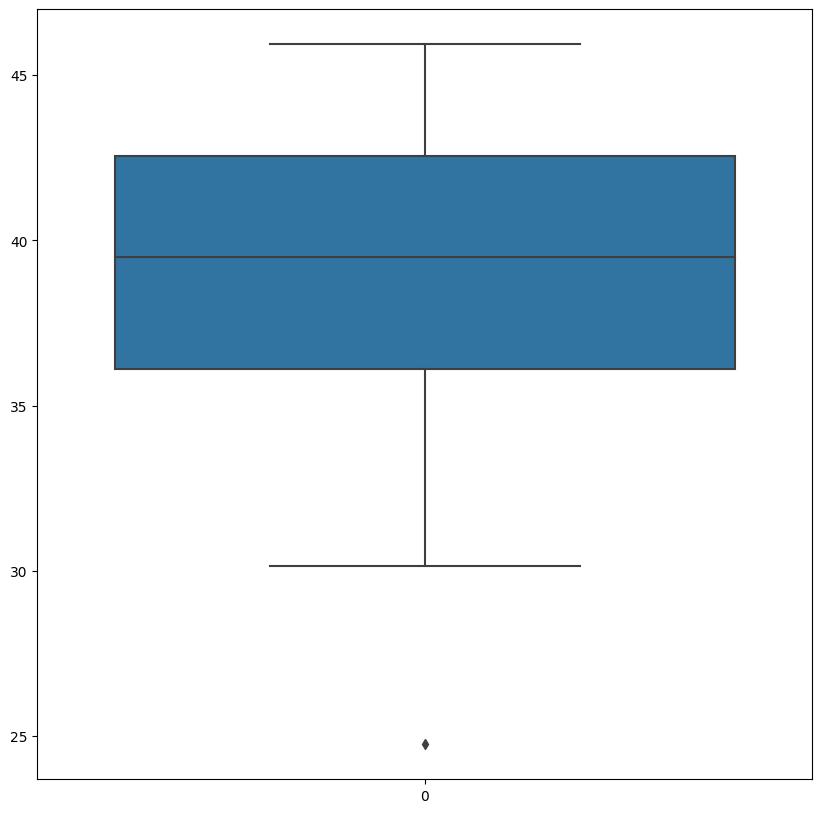

In [11]:
import seaborn as sns
sns.boxplot(train_v2['inc_angle'])
plt.show()

In [12]:

X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], X_band_2[:, :, :, np.newaxis]], axis=-1)

In [13]:
print("X_band_1 data shape -", X_band_1.shape)
print("X_band_2 data shape -", X_band_2.shape)
print("X_train data shape -", X_train.shape)
print(X_train[0,0,0,0], X_train[0,0,0,1])
print(X_band_1[0,0,0], X_band_2[0,0,0])


X_band_1 data shape - (1604, 75, 75)
X_band_2 data shape - (1604, 75, 75)
X_train data shape - (1604, 75, 75, 2)
-27.87836 -27.154118
-27.87836 -27.154118


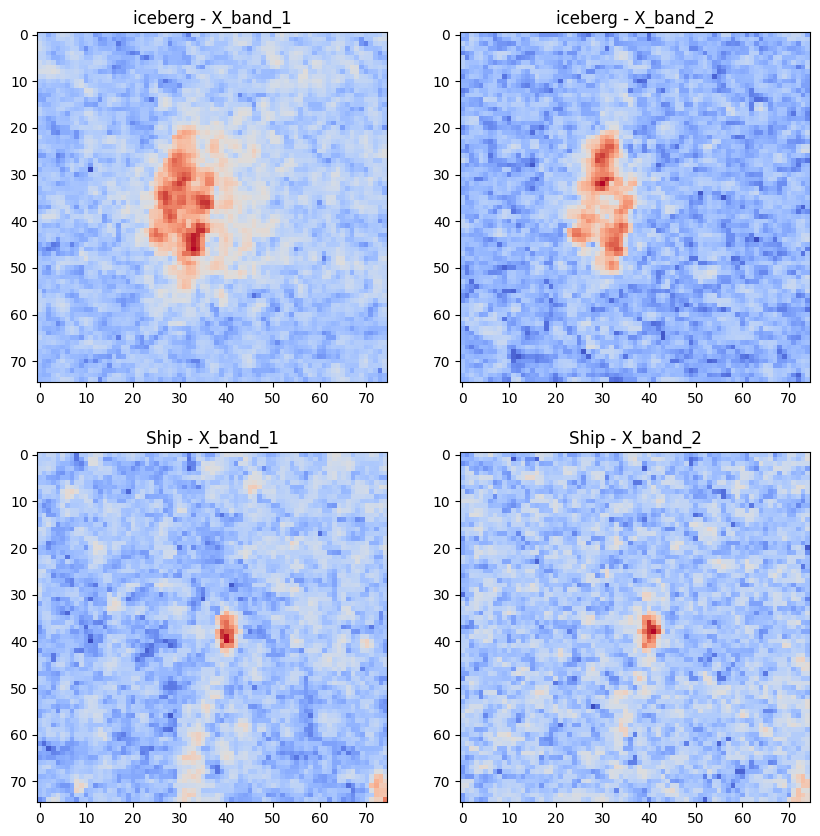

In [14]:

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(10, 10))
ax1[0].imshow(X_band_1[12,:,:], cmap='coolwarm')
ax1[0].set_title('iceberg - X_band_1')
ax1[1].imshow(X_band_2[12,:,:], cmap='coolwarm')
ax1[1].set_title('iceberg - X_band_2')

ax2[0].imshow(X_band_1[14,:,:], cmap='coolwarm')
ax2[0].set_title('Ship - X_band_1')
ax2[1].imshow(X_band_2[14,:,:], cmap='coolwarm')
ax2[1].set_title('Ship - X_band_2')

plt.show()

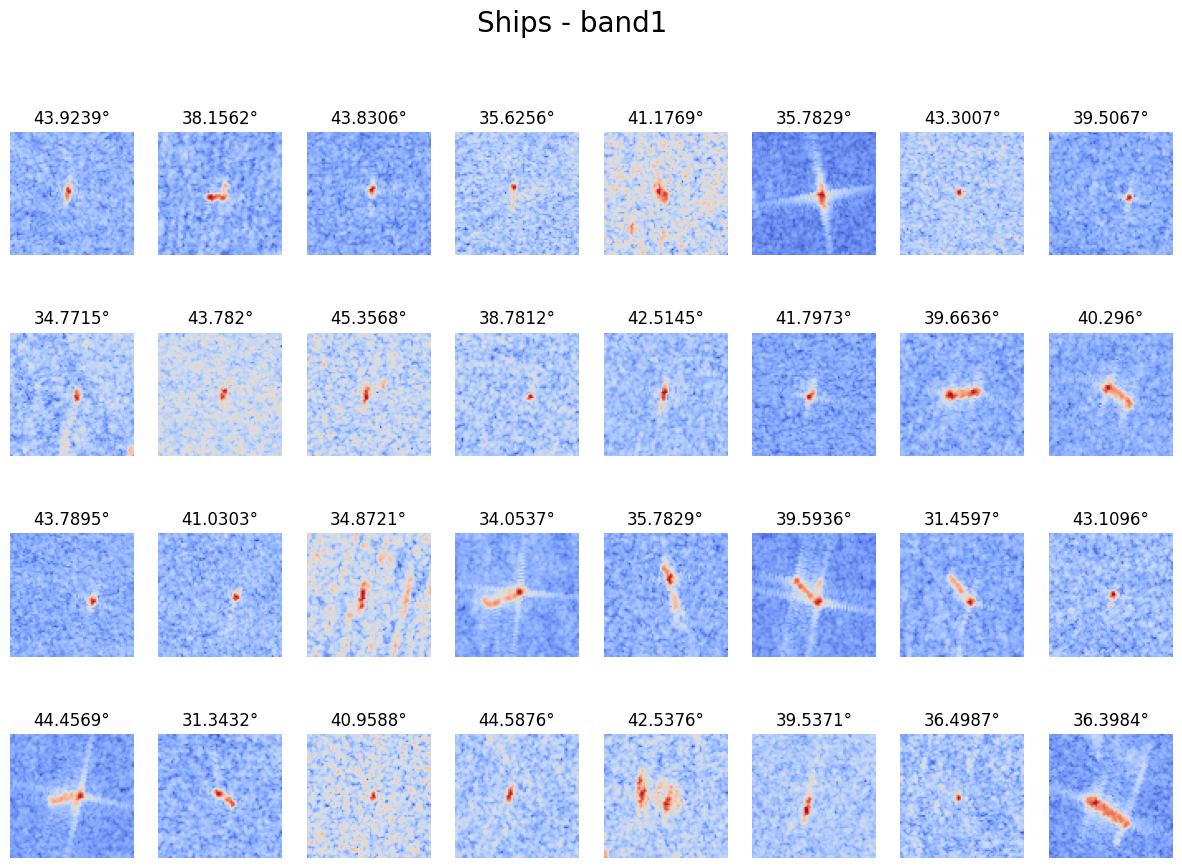

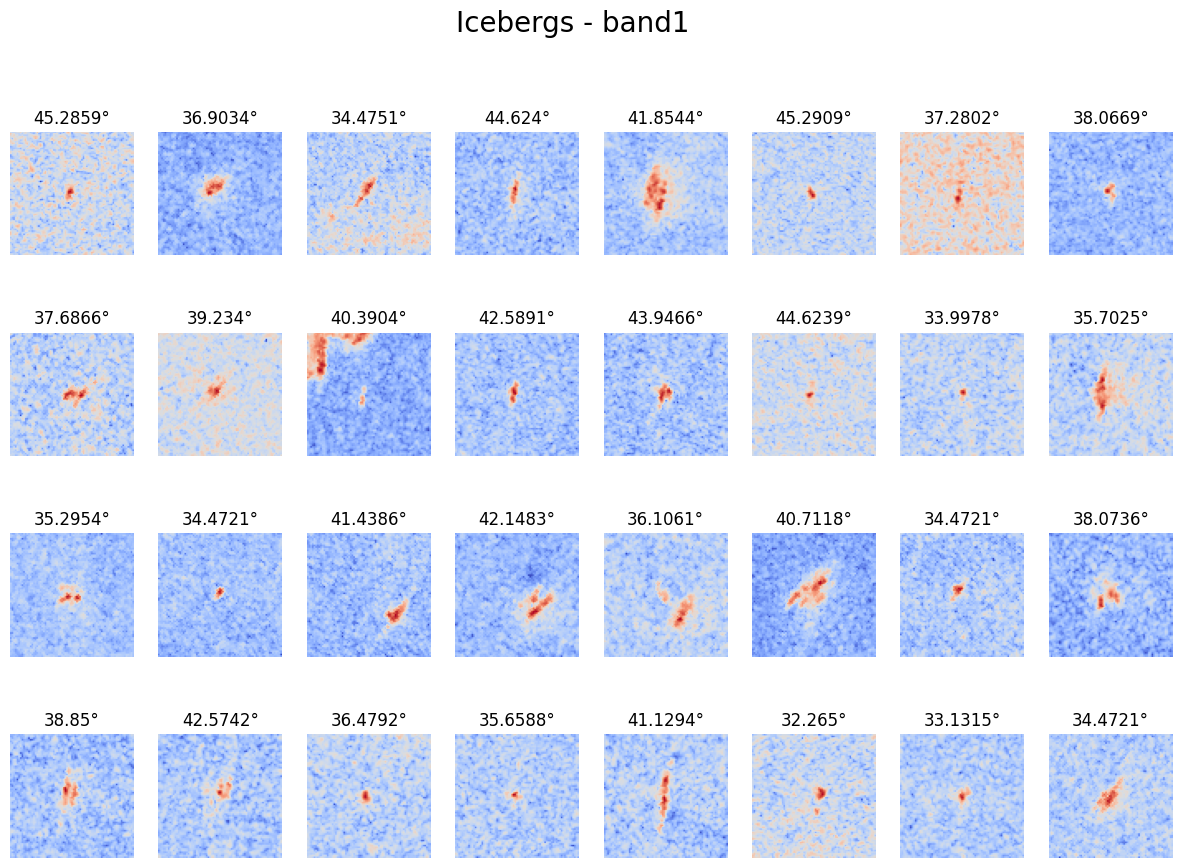

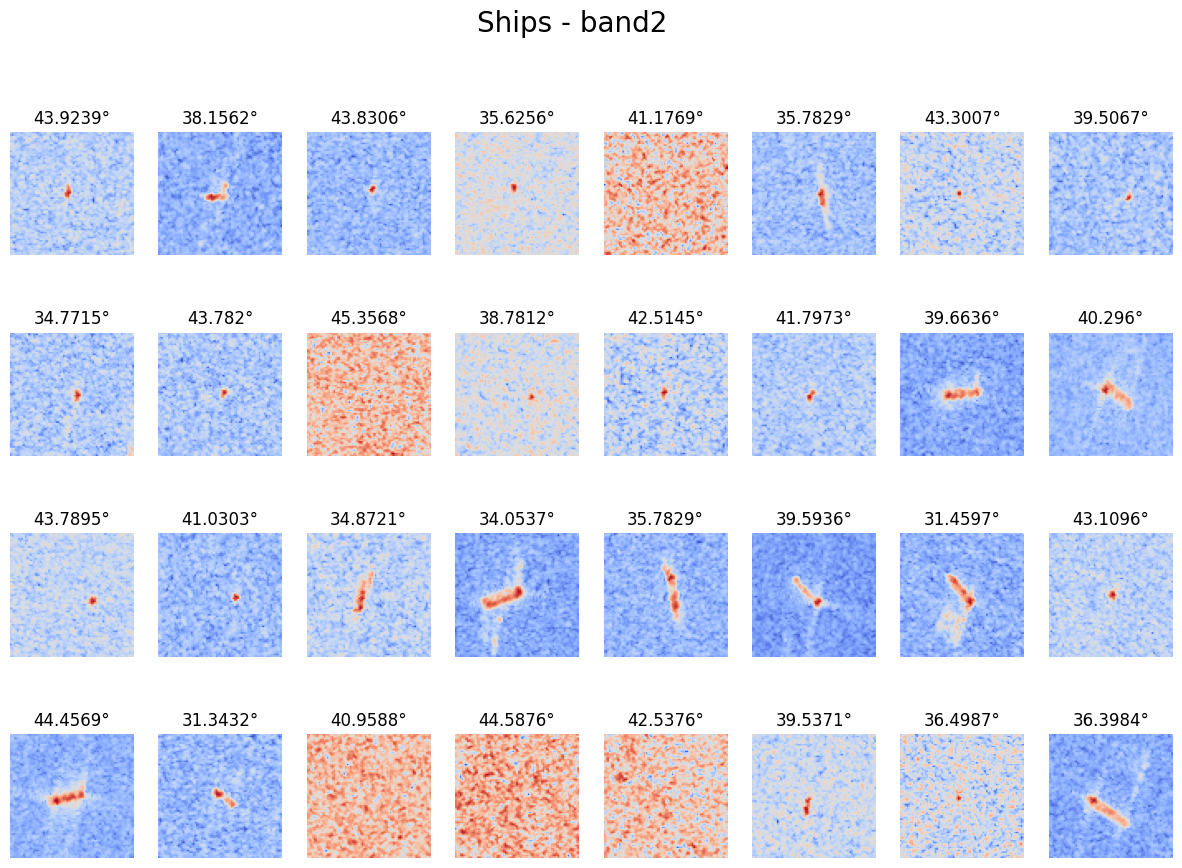

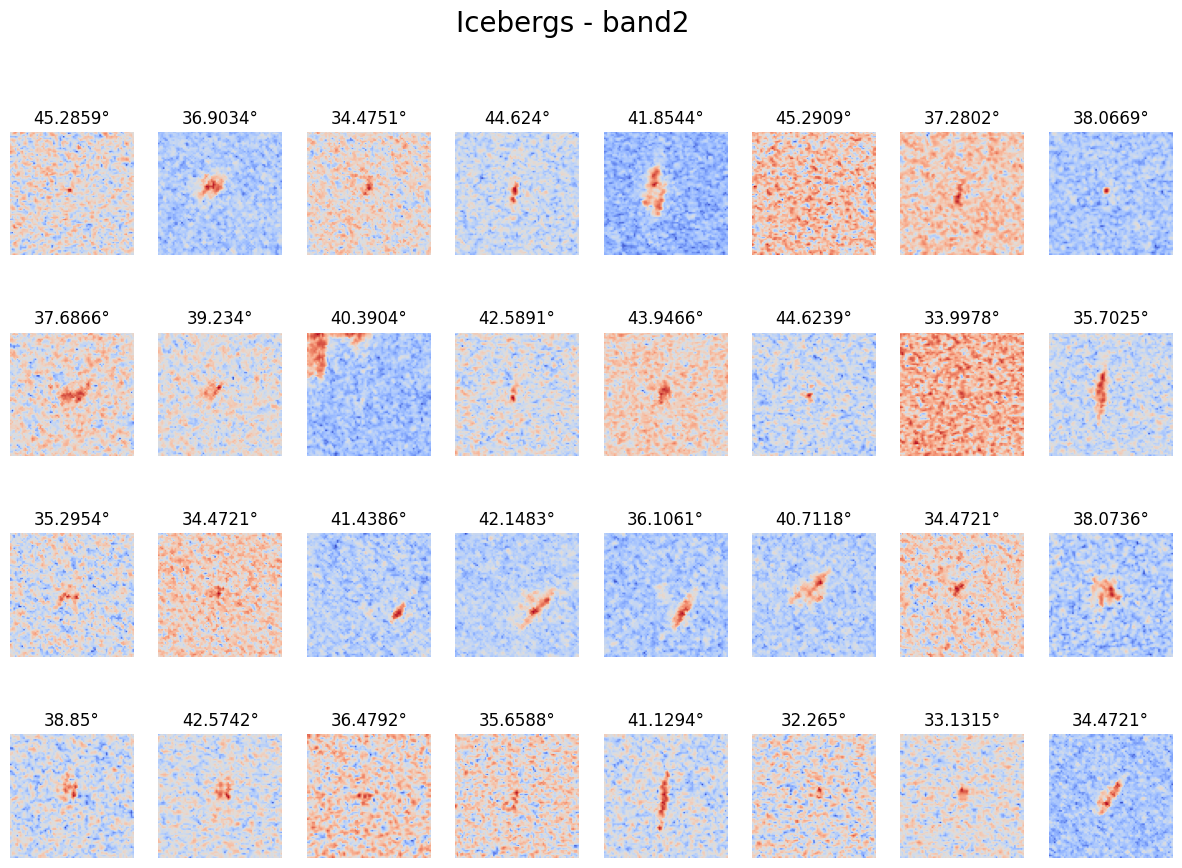

In [15]:
ship_images = train[train["is_iceberg"] == 0].head(32)
iceberg_images = train[train["is_iceberg"] == 1].head(32)

def plot_images(images,title, number):
    fig, axs = plt.subplots(4, 8, figsize=(15, 10))
    fig.suptitle(title, fontsize=20)
    for i, ax in enumerate(axs.ravel()):
        ax.imshow(np.array(images.iloc[i]["band_"+ str(number)]).reshape(75,75), cmap='coolwarm')
        ax.set_title("{}°".format(images.iloc[i]["inc_angle"]))
        ax.axis('off')

plot_images(ship_images, "Ships - band" + str(1), 1)
plot_images(iceberg_images, "Icebergs - band" + str(1), 1)
plot_images(ship_images, "Ships - band" + str(2), 2)
plot_images(iceberg_images, "Icebergs - band" + str(2), 2)

plt.show()

In [16]:

pio.renderers.default='notebook'

py.init_notebook_mode(connected=True)
def plotmy3d(c, name):

    data = [
        go.Surface(
            z=c
        )
    ]
    layout = go.Layout(
        title=name,
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)


In [17]:
plotmy3d(X_train[12,:,:,0], 'iceberg')
plotmy3d(X_train[12,:,:,1], 'iceberg')


In [18]:
plotmy3d(X_train[14,:,:,0], 'ship')
plotmy3d(X_train[14,:,:,1], 'ship')


In [19]:
X_train = normalize(X_train)
# X_train[:5]

In [20]:
def create_model(optimizer, use_dropout=True, name='model'):
    convNN=Sequential(name=name)

    convNN.add(Conv2D(128, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 2)))
    convNN.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    if use_dropout:
        convNN.add(Dropout(0.2))

    convNN.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    convNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    if use_dropout:
        convNN.add(Dropout(0.3))

    convNN.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    convNN.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    if use_dropout:
        convNN.add(Dropout(0.2))

    #Flatten the data for upcoming dense layers
    convNN.add(Flatten())

    convNN.add(Dense(128))
    convNN.add(Activation('relu'))
    if use_dropout:
        convNN.add(Dropout(0.2))

    convNN.add(Dense(64))
    convNN.add(Activation('relu'))
    if use_dropout:
        convNN.add(Dropout(0.1))

    #Sigmoid Layer
    convNN.add(Dense(1))
    convNN.add(Activation('sigmoid'))

    convNN.compile(optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    convNN.summary()

    return convNN

In [21]:
target_train=train['is_iceberg']
X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_train, target_train, random_state=1, train_size=0.7)

In [22]:
AdamOptimizer = Adam()
SGDOptimizer = SGD()

In [23]:
def fitNetwork(optimizer, epochs=50, batch_size=32, use_dropout=True, name='model'):
    model = create_model(optimizer, use_dropout, name)
    return model, model.fit(X_train_cv, y_train_cv,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_valid, y_valid),
             )
    

In [24]:
training_epochs = 200
training_batch_size = 32

Model: "sgd_no_dropouts"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 128)       2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)     

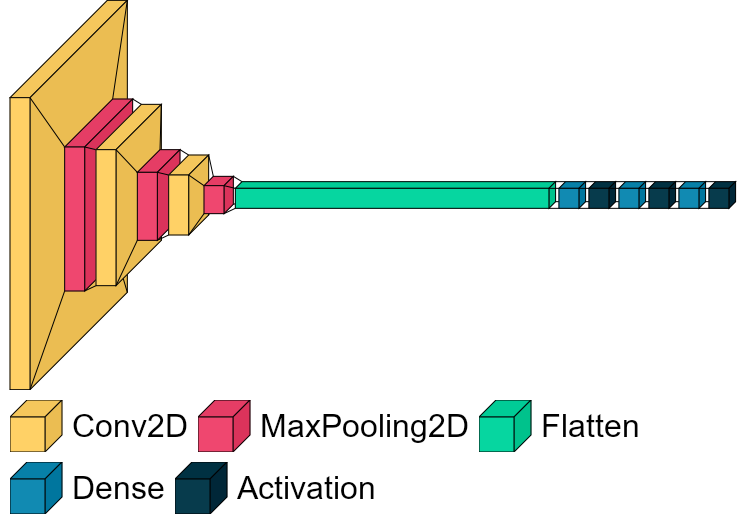

In [25]:
sgd_no_dropouts, sgd_no_dropouts_history = fitNetwork(SGDOptimizer, epochs=training_epochs, batch_size=training_batch_size, use_dropout=False, name='sgd_no_dropouts')
font = ImageFont.truetype("arial.ttf", 32)  
visualkeras.layered_view(sgd_no_dropouts, legend=True, font=font, to_file='network_layered_view.png')


In [26]:
sgd_dropouts, sgd_dropouts_history = fitNetwork(SGDOptimizer, epochs=training_epochs, batch_size=training_batch_size, use_dropout=True, name='sgd_dropouts')

Model: "sgd_dropouts"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 73, 73, 128)       2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 17, 17, 128)      

In [27]:
adam_dropouts, adam_dropouts_history = fitNetwork(AdamOptimizer, epochs=training_epochs, batch_size=training_batch_size, use_dropout=True,  name='adam_dropouts')

Model: "adam_dropouts"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 73, 73, 128)       2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 36, 36, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 128)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 17, 17, 128)     

In [28]:
adam_no_dropouts, adam_no_dropouts_history = fitNetwork(AdamOptimizer, epochs=training_epochs, batch_size=training_batch_size, use_dropout=False, name='adam_no_dropouts')

Model: "adam_no_dropouts"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 73, 73, 128)       2432      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 15, 15, 64)        73792     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)    

In [29]:
sgd_no_dropouts_history

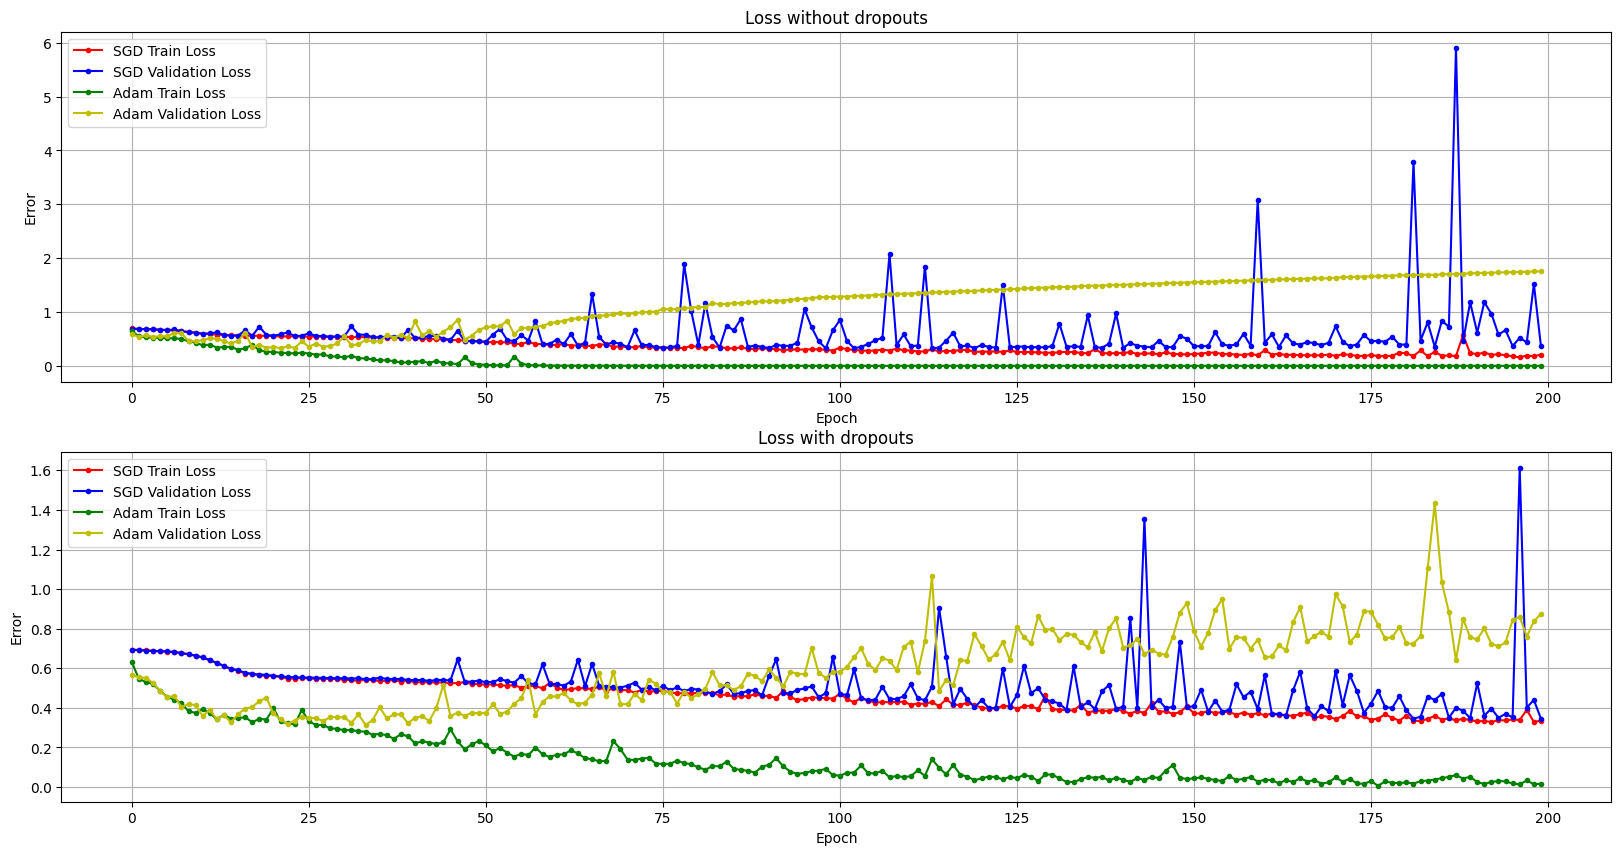

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

ax1.plot(sgd_no_dropouts_history.history["loss"], color='r', marker='.', label="SGD Train Loss")
ax1.plot(sgd_no_dropouts_history.history["val_loss"],'b', marker='.', label="SGD Validation Loss")
ax1.plot(adam_no_dropouts_history.history["loss"],'g', marker='.', label="Adam Train Loss")
ax1.plot(adam_no_dropouts_history.history["val_loss"],'y', marker='.', label="Adam Validation Loss")
ax1.set_title("Loss without dropouts")
ax1.legend()
ax1.set_xlabel('Epoch'), ax1.set_ylabel('Error')
ax1.grid()

ax2.plot(sgd_dropouts_history.history["loss"],'r', marker='.', label="SGD Train Loss")
ax2.plot(sgd_dropouts_history.history["val_loss"],'b', marker='.', label="SGD Validation Loss")
ax2.plot(adam_dropouts_history.history["loss"],'g', marker='.', label="Adam Train Loss")
ax2.plot(adam_dropouts_history.history["val_loss"],'y', marker='.', label="Adam Validation Loss")
ax2.set_title("Loss with dropouts")
ax2.legend()
ax2.set_xlabel('Epoch'), ax2.set_ylabel('Error')
ax2.grid()


plt.show()

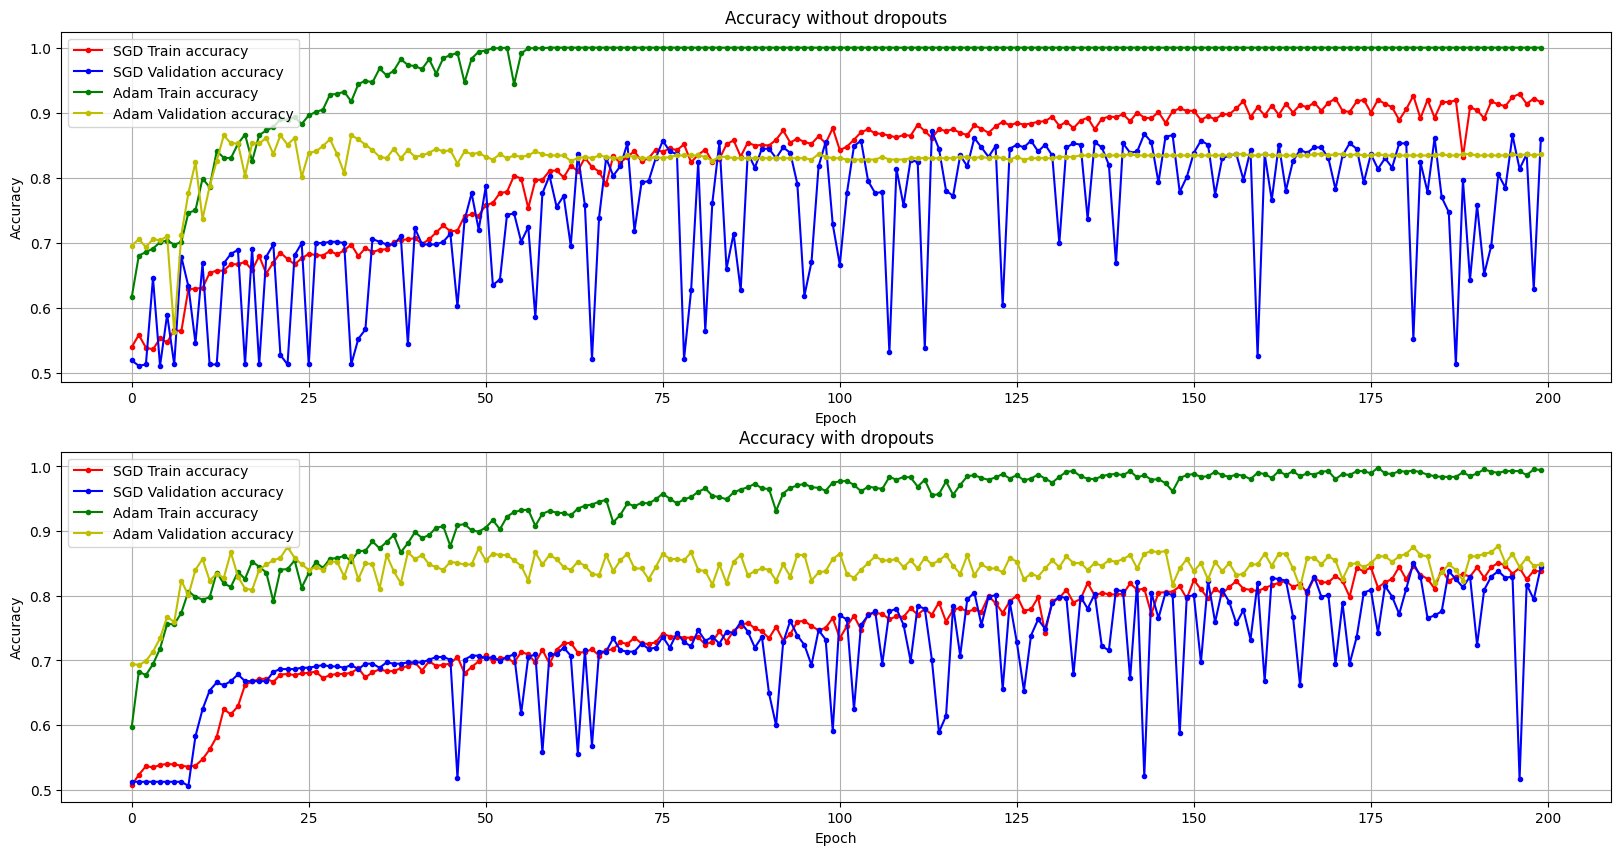

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

ax1.plot(sgd_no_dropouts_history.history["accuracy"],'r', marker='.', label="SGD Train accuracy")
ax1.plot(sgd_no_dropouts_history.history["val_accuracy"],'b', marker='.', label="SGD Validation accuracy")
ax1.plot(adam_no_dropouts_history.history["accuracy"],'g', marker='.', label="Adam Train accuracy")
ax1.plot(adam_no_dropouts_history.history["val_accuracy"],'y', marker='.', label="Adam Validation accuracy")
ax1.set_title("Accuracy without dropouts")
ax1.legend()
ax1.set_xlabel('Epoch'), ax1.set_ylabel('Accuracy')
ax1.grid()

ax2.plot(sgd_dropouts_history.history["accuracy"],'r', marker='.', label="SGD Train accuracy")
ax2.plot(sgd_dropouts_history.history["val_accuracy"],'b', marker='.', label="SGD Validation accuracy")
ax2.plot(adam_dropouts_history.history["accuracy"],'g', marker='.', label="Adam Train accuracy")
ax2.plot(adam_dropouts_history.history["val_accuracy"],'y', marker='.', label="Adam Validation accuracy")
ax2.set_title("Accuracy with dropouts")
ax2.legend()
ax2.set_xlabel('Epoch'), ax2.set_ylabel('Accuracy')
ax2.grid()

plt.show()

In [32]:
print('SGD Optimizer')
print('Model with dropouts')

print('Accuracy over training data is ', \
      accuracy_score(y_train_cv, (sgd_dropouts.predict(X_train_cv) > 0.5).astype("int32")))
                                    
print('Accuracy over testing data is ', \
      accuracy_score(y_valid, (sgd_dropouts.predict(X_valid) > 0.5).astype("int32")))


print('Model without dropouts')
print('Accuracy over training data is ', \
      accuracy_score(y_train_cv, (sgd_no_dropouts.predict(X_train_cv) > 0.5).astype("int32")))
                                    
print('Accuracy over testing data is ', \
      accuracy_score(y_valid, (sgd_no_dropouts.predict(X_valid) > 0.5).astype("int32")))


SGD Optimizer
Model with dropouts
36/36 [==============================] - 1s 15ms/step
Accuracy over training data is  0.8591800356506238
16/16 [==============================] - 0s 11ms/step
Accuracy over testing data is  0.8443983402489627
Model without dropouts
36/36 [==============================] - 1s 11ms/step
Accuracy over training data is  0.9429590017825312
16/16 [==============================] - 0s 11ms/step
Accuracy over testing data is  0.8589211618257261


In [33]:
print('Adam Optimizer')
print('Model with dropouts')

print('Accuracy over training data is ', \
      accuracy_score(y_train_cv, (adam_dropouts.predict(X_train_cv) > 0.5).astype("int32")))
                                    
print('Accuracy over testing data is ', \
      accuracy_score(y_valid, (adam_dropouts.predict(X_valid) > 0.5).astype("int32")))


print('Model without dropouts')
print('Accuracy over training data is ', \
      accuracy_score(y_train_cv, (adam_no_dropouts.predict(X_train_cv) > 0.5).astype("int32")))
                                    
print('Accuracy over testing data is ', \
      accuracy_score(y_valid, (adam_no_dropouts.predict(X_valid) > 0.5).astype("int32")))


Adam Optimizer
Model with dropouts
36/36 [==============================] - 1s 12ms/step
Accuracy over training data is  1.0
16/16 [==============================] - 0s 12ms/step
Accuracy over testing data is  0.8485477178423236
Model without dropouts
36/36 [==============================] - 1s 12ms/step
Accuracy over training data is  1.0
16/16 [==============================] - 0s 12ms/step
Accuracy over testing data is  0.8360995850622407
